In [1]:
%load_ext autoreload
%autoreload 2

## 3. Modeling - Gradient Boosting

### 3.1 Load and Explore Dataset

**[3.1.1]** Import the pandas, numpy, and dump package

In [4]:
import pandas as pd
import numpy as np
from joblib import dump

In [5]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

In [6]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### 3.4 Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Fit the model without hyperparameter tuning.

In [8]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42)

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [9]:
from joblib import dump

dump(gb_classifier, '../models/gb_classifier.joblib')

['../models/gb_classifier.joblib']

In [10]:
import sys
sys.path.insert(0, '../src')

In [11]:
from models.predict_model import predict_model

                roc-auc score
Training Set         0.999471
Validation Set       0.999285


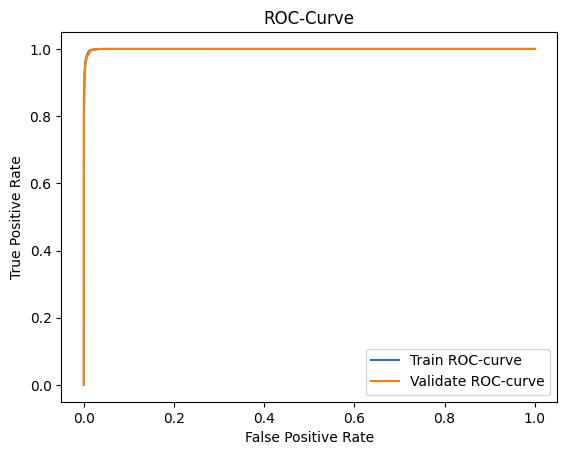

In [13]:
predict_model(gb_classifier, X_train, X_val, y_train, y_val)

In [14]:
from visualization.submission_file import submission_file

In [15]:
y_test_probs = gb_classifier.predict_proba(X_test)[:, 1]

In [16]:
submission_4 = submission_file(y_test_probs)

In [17]:
submission_4[submission_4['drafted'] != 0]

,player_id,drafted
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.1
13,26544ebf-a284-48b3-a2c8-dcccb0fd989a,0.5
38,e5124527-48a4-4bae-a12f-c3a5f5b8a51e,0.7
39,7a727e8c-2480-4e1e-808e-06ea762c6a11,0.8
44,e6ee7199-c545-4c05-9a5f-50f582734e30,0.9
...,...,...
4669,5713c9ad-7517-444c-8724-f715f7e10c14,0.7
4705,e961e1fc-413a-4ace-8a17-c72c647b5d42,0.9
4737,7e8edff7-8979-4cf9-b782-737e05aa5abb,0.1
4739,f5f0bbeb-db48-4449-a405-72ebc0a4d644,0.8


In [18]:
submission_4.to_csv('../data/submission/submission_4_gb_classifier.csv', index=False)